# Agenda
##    Anamoly detection
    - Isoltaion Forest
    - One class SVM



# Steps
- ## Dataset: Credit Card Fraud Detection Dataset (Kaggle)

Preprocess the data:
- Handle missing values.
- Scale features using StandardScaler or MinMaxScaler.
- Apply both Isolation Forest and One-Class SVM.
- Compare results:
- Identify anomalies and evaluate performance using metrics like Precision and Recall.
- Visualize the results to understand detected anomalies.


In [2]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv('./datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df = df.drop(columns=['Class'])

In [6]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)
df_pca.shape

(284807, 2)

In [7]:
scaler  = StandardScaler()
df_scaled = scaler.fit_transform(df_pca)

In [7]:
iso_forest = IsolationForest(n_estimators=100,contamination=.001,random_state=2)
iso_forest.fit(df_scaled)

iso_forest_pred = iso_forest.predict(df_scaled)

In [11]:
#separating Anamolies and 
anomalies = df_scaled[iso_forest_pred == -1]
normals = df_scaled[iso_forest_pred == 1]


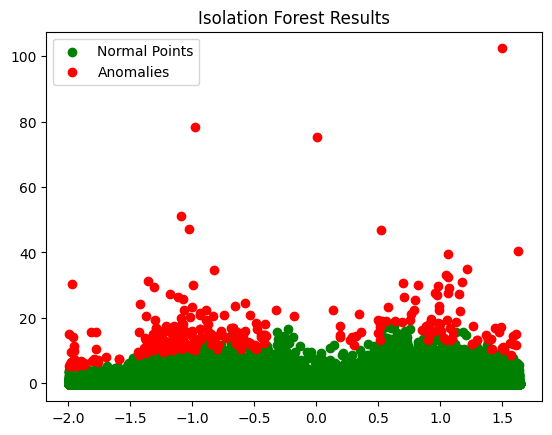

In [12]:

plt.scatter(normals[:, 0], normals[:, 1], c='green', label='Normal Points')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', label='Anomalies')
plt.title('Isolation Forest Results')
plt.legend()
plt.show()

In [8]:
one_class_svm = OneClassSVM(kernel='linear',gamma=.1,nu=.4)
one_class_svm.fit(df_scaled)
one_class_svm_predict = one_class_svm.predict(df_scaled)

In [ ]:
anomalies = df_scaled[y_pred == -1]
normals = df_scaled[y_pred == 1] 